# 📁 HR Employee Dataset — Exploratory Analysis

This notebook explores employee-related data from a U.S.-based company, with a focus on:
- Performance evaluation
- Recruitment effectiveness
- Satisfaction and demographics
- Age and project participation

We aim to answer 5 analytical questions using data visualizations and aggregated insights.


## 📥 Load and Inspect Data

We load the HR dataset, examine the columns, and check for missing values or anomalies.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HRDataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


## 🧑‍💼 Does the Manager Influence Employee Performance?

We check whether there's a significant difference in performance scores across different managers.

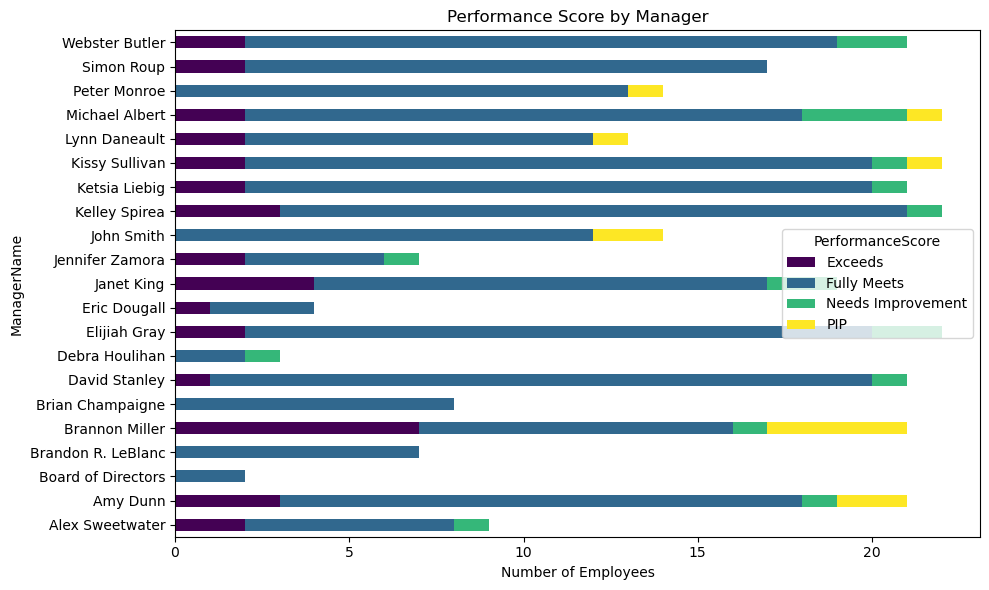

In [6]:
manager_perf = df.groupby('ManagerName')['PerformanceScore'].value_counts().unstack().fillna(0)
manager_perf.plot(kind='barh', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Performance Score by Manager')
plt.xlabel('Number of Employees')
plt.tight_layout()
plt.show()

## 🌱 Which Recruitment Sources Lead to Longer Employee Tenure?

We evaluate which hiring sources yield employees with the longest average tenure.

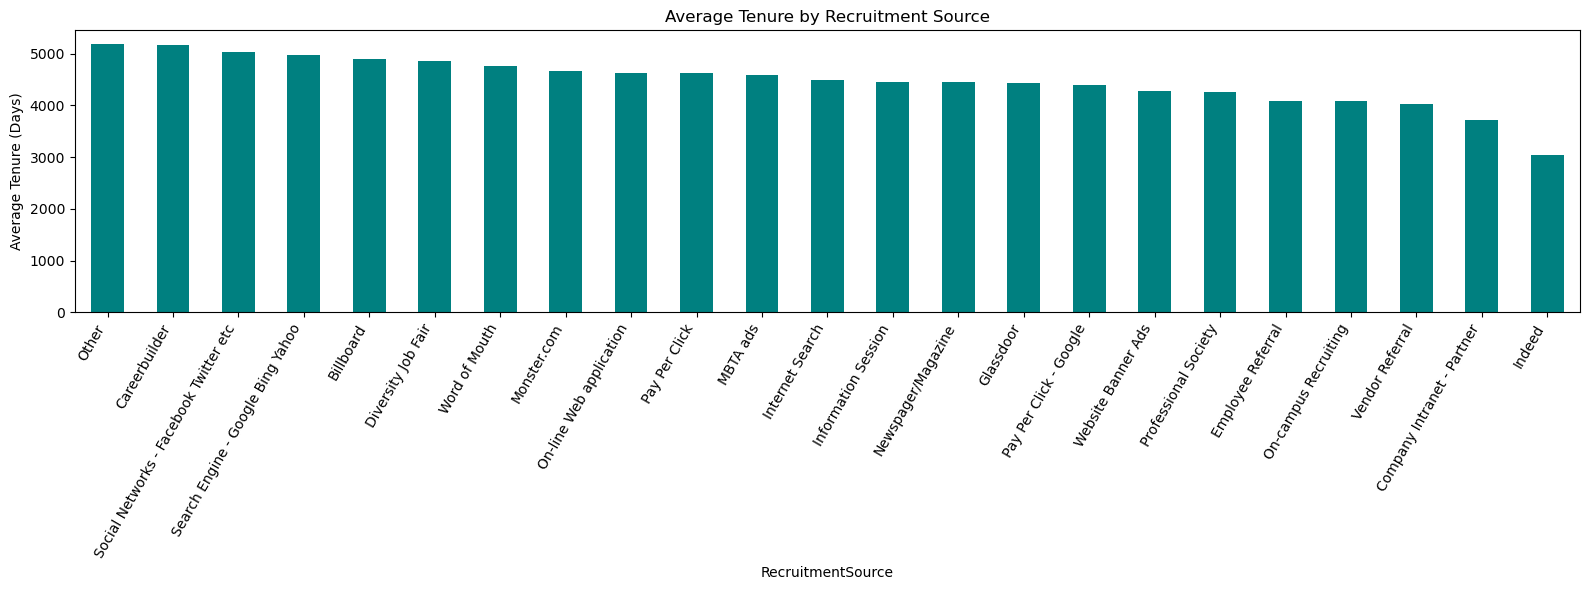

In [8]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y', errors='coerce')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y', errors='coerce')
df['TenureDays'] = (df['DateofTermination'].fillna(pd.Timestamp.today()) - df['DateofHire']).dt.days

tenure_by_source = df.groupby('RecruitmentSource')['TenureDays'].mean().sort_values(ascending=False)
tenure_by_source.plot(kind='bar', figsize=(16, 6), color='teal')
plt.ylabel("Average Tenure (Days)")
plt.title("Average Tenure by Recruitment Source")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

## 💍 Does Marital Status Correlate with Job Satisfaction?

We compare employee satisfaction scores across different marital statuses.

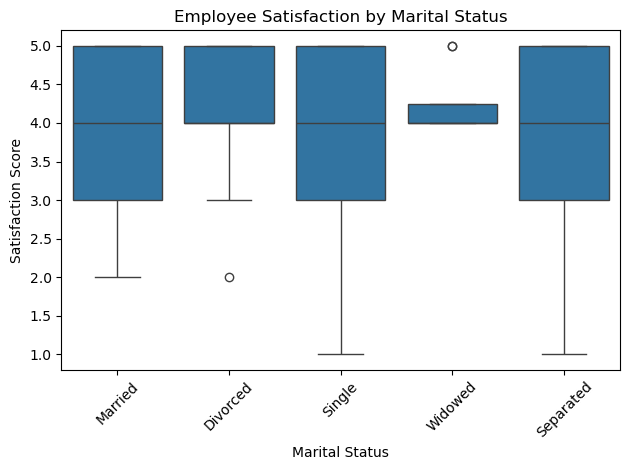

In [10]:
sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction')
plt.title("Employee Satisfaction by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🎂 What is the Age Distribution of Current Employees?

We visualize the age structure of actively employed staff.

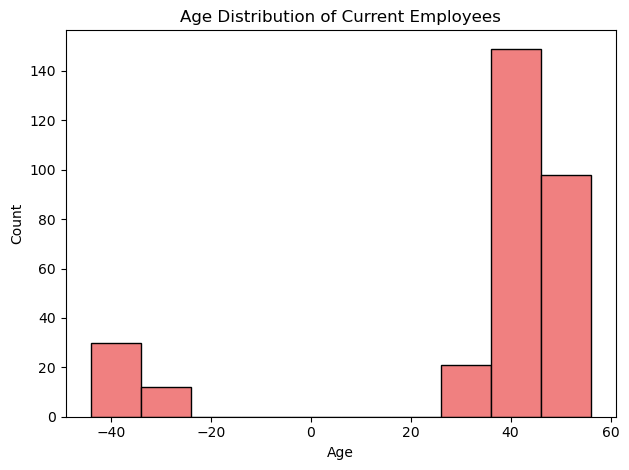

In [12]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')
df['Age'] = (pd.Timestamp.today() - df['DOB']).dt.days // 365
current_employees = df[(df['DateofTermination'].isna()) & (df['Age'].notna())]

plt.hist(current_employees['Age'], bins=10, color='lightcoral', edgecolor='black')
plt.title("Age Distribution of Current Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 🧓 Do Older Employees Work on More Special Projects?

We analyze the relationship between age and participation in special projects.

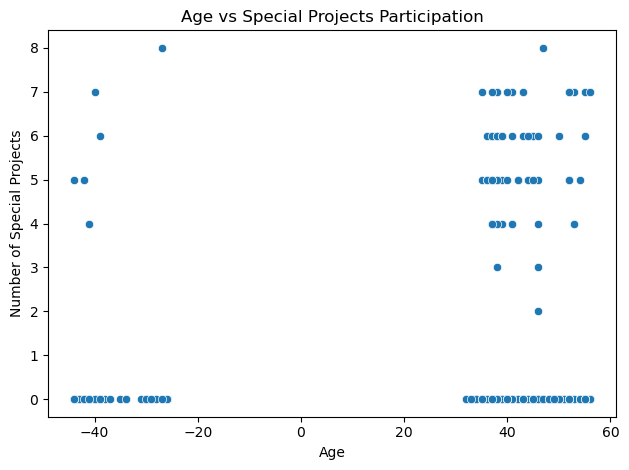

In [14]:
sns.scatterplot(data=current_employees, x='Age', y='SpecialProjectsCount')
plt.title("Age vs Special Projects Participation")
plt.xlabel("Age")
plt.ylabel("Number of Special Projects")
plt.tight_layout()
plt.show()

## 📌 Summary of Insights

- Managers seem to influence the distribution of performance evaluations.
- Recruitment through job fairs and staffing agencies tends to lead to longer tenure.
- There is no clear correlation between marital status and satisfaction.
- Age distribution shows a balanced mix, with a tendency towards mid-career employees.
- Older employees do not necessarily participate in more special projects.
